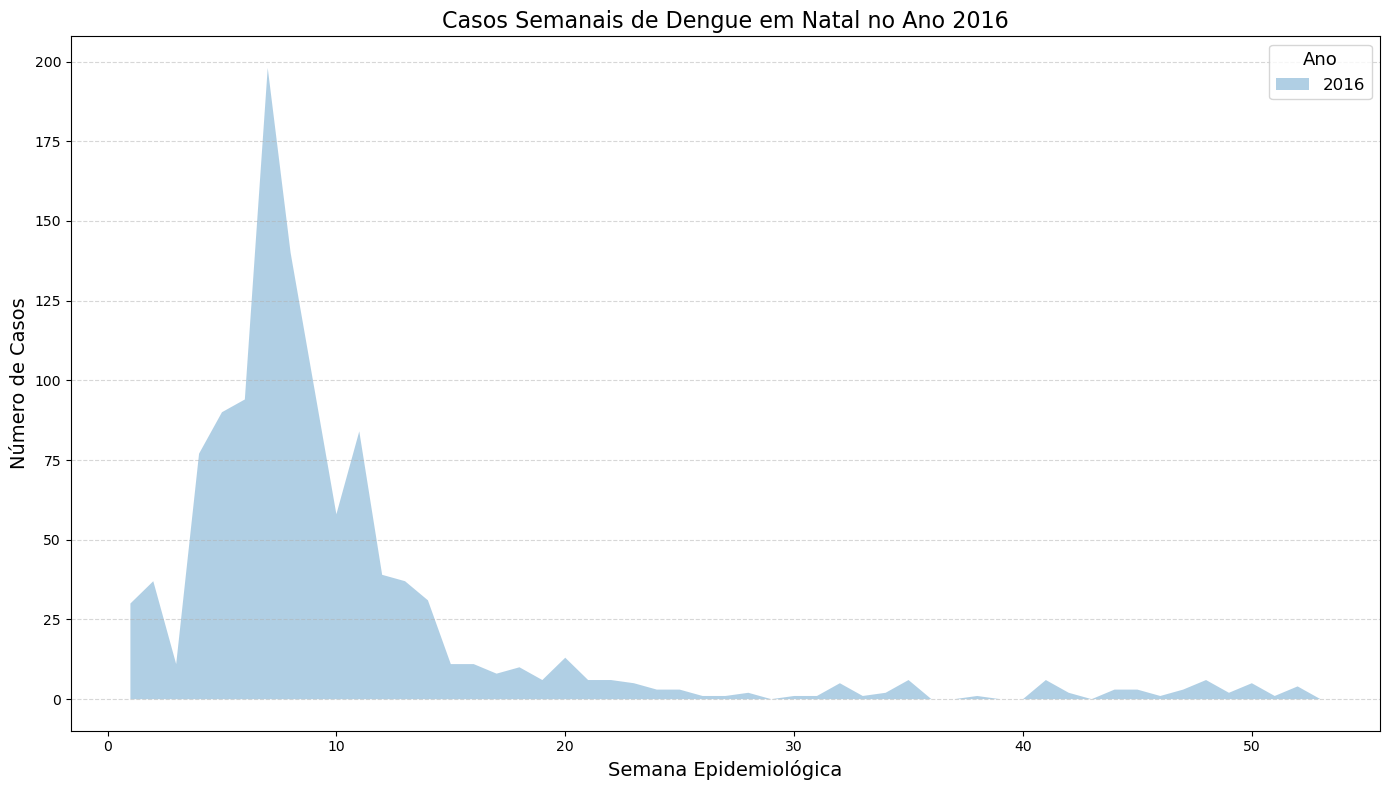

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. Carregar os dados
# ---------------------------------------------------------
df = pd.read_parquet('/home/rgarcia/mcs/data/processed/sinan/DENG240810.parquet')
df = df[df['DT_NOTIFIC'].dt.year == 2016]

# ---------------------------------------------------------
# 2. Converter datas e extrair ano e semana epidemiológica
# ---------------------------------------------------------
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], errors='coerce')
df = df.dropna(subset=['DT_NOTIFIC'])

df['Ano'] = df['DT_NOTIFIC'].dt.year
df['SemanaEpi'] = df['DT_NOTIFIC'].dt.isocalendar().week

# ---------------------------------------------------------
# 3. Agrupar por Ano e Semana
# ---------------------------------------------------------
df_grouped = df.groupby(['Ano', 'SemanaEpi'])['CASES'].sum().reset_index()

# ---------------------------------------------------------
# 4. Pivotar para formato Ano x Semana
# ---------------------------------------------------------
pivot = df_grouped.pivot(index='SemanaEpi', columns='Ano', values='CASES').fillna(0)
pivot = pivot.sort_index()

# ---------------------------------------------------------
# 5. Plotar gráfico estilo "onda" (áreas sobrepostas)
# ---------------------------------------------------------
plt.figure(figsize=(14, 8))

for year in pivot.columns:
    plt.fill_between(
        pivot.index,
        pivot[year],
        alpha=0.35,
        label=str(year)
    )

# ---------------------------------------------------------
# 6. Ajustes de estilo
# ---------------------------------------------------------
plt.title('Casos Semanais de Dengue em Natal no Ano 2016', fontsize=16)
plt.xlabel('Semana Epidemiológica', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)
plt.legend(title='Ano', fontsize=12, title_fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# ---------------------------------------------------------
# 7. Mostrar
# ---------------------------------------------------------
plt.show()
